<a href="https://colab.research.google.com/github/Isabellitankian/FIAP-2022/blob/main/Usando_MLPRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning

☘
Códigos e análises da PARTE 1: 


In [ ]:
import pandas as pd #pandas faz tudo e mais um pouco.
from matplotlib import pyplot as plt  #para construir e customizar gráficos.
import seaborn as sns #para visualizar uns gráficos.
import numpy as np #numpy porque é sempre bom importar numpy né. 

from matplotlib import colors 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
dados = pd.read_csv('./dataset.csv') #Definindo que o arquivo ficará com o nome "dados"
dados.head(20)

In [ ]:
dados.describe() #Para ver uma descrição mais detalhada 

In [ ]:
dados.info() #Para visualizar as as informações 

In [ ]:
dados.drop_duplicates(keep='first', inplace=True) #Remover a duplicidade dos dados.
dados.head(10)

In [ ]:
# Removendo dados faltantes
dados.dropna(inplace=True)
dados.head(10)

In [ ]:
#Removendo os dados não uteis
dados = dados.drop(['PARTY','ASSETS', 'LIABILITIES', 'CATEGORY', 'SYMBOL','NAME', 'CRIMINAL\nCASES', 'OVER TOTAL ELECTORS \nIN CONSTITUENCY', 'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY'],axis=1) 
dados.head(10)

,STATE,CONSTITUENCY,WINNER,GENDER,AGE,EDUCATION,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,TOTAL ELECTORS
0,Telangana,ADILABAD,1,MALE,52.0,12th Pass,376892,482,377374,1489790
1,Telangana,ADILABAD,0,MALE,54.0,Post Graduate,318665,149,318814,1489790
2,Telangana,ADILABAD,0,MALE,52.0,12th Pass,314057,181,314238,1489790
4,Uttar Pradesh,AGRA,1,MALE,58.0,Doctorate,644459,2416,646875,1937690
5,Uttar Pradesh,AGRA,0,MALE,47.0,Post Graduate,434199,1130,435329,1937690
6,Uttar Pradesh,AGRA,0,FEMALE,54.0,Post Graduate,44877,272,45149,1937690
7,Maharashtra,AHMADNAGAR,1,MALE,37.0,Doctorate,696961,7699,704660,1861396
8,Maharashtra,AHMADNAGAR,0,MALE,34.0,Graduate,419364,3822,423186,1861396
9,Maharashtra,AHMADNAGAR,0,MALE,62.0,Graduate,31644,163,31807,1861396
10,Gujarat,AHMEDABAD EAST,1,MALE,58.0,Others,745810,4024,749834,1811851


In [ ]:
dados.nunique()

STATE               36
CONSTITUENCY       539
WINNER               2
GENDER               2
AGE                 60
EDUCATION           13
GENERAL\nVOTES    2006
POSTAL\nVOTES     1209
TOTAL\nVOTES      2010
TOTAL ELECTORS     542
dtype: int64

In [ ]:
dados["GENDER"] = dados["GENDER"].apply(lambda x: 0 if x == "MALE" else 1)
dados.head(10)

,STATE,CONSTITUENCY,WINNER,GENDER,AGE,EDUCATION,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,TOTAL ELECTORS
0,Telangana,ADILABAD,1,0,52.0,12th Pass,376892,482,377374,1489790
1,Telangana,ADILABAD,0,0,54.0,Post Graduate,318665,149,318814,1489790
2,Telangana,ADILABAD,0,0,52.0,12th Pass,314057,181,314238,1489790
4,Uttar Pradesh,AGRA,1,0,58.0,Doctorate,644459,2416,646875,1937690
5,Uttar Pradesh,AGRA,0,0,47.0,Post Graduate,434199,1130,435329,1937690
6,Uttar Pradesh,AGRA,0,1,54.0,Post Graduate,44877,272,45149,1937690
7,Maharashtra,AHMADNAGAR,1,0,37.0,Doctorate,696961,7699,704660,1861396
8,Maharashtra,AHMADNAGAR,0,0,34.0,Graduate,419364,3822,423186,1861396
9,Maharashtra,AHMADNAGAR,0,0,62.0,Graduate,31644,163,31807,1861396
10,Gujarat,AHMEDABAD EAST,1,0,58.0,Others,745810,4024,749834,1811851


In [ ]:
dados.shape

(2018, 10)

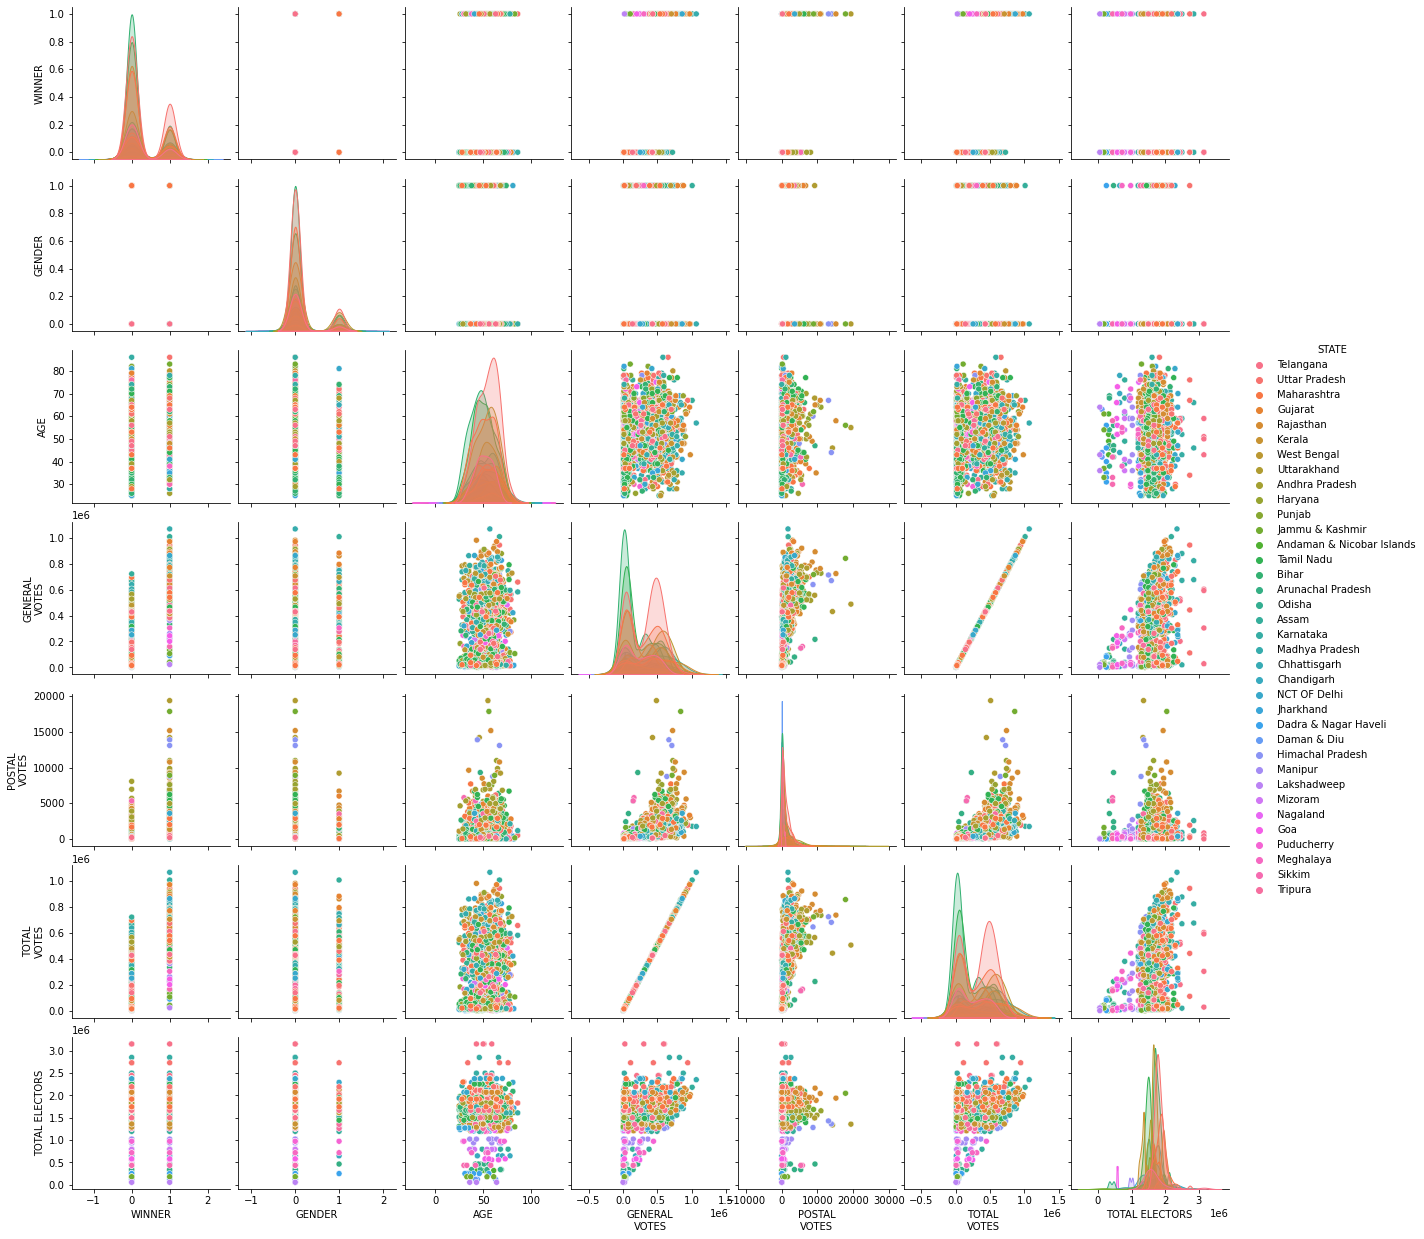

In [ ]:
#Construindo gráficos com as comparações viavéis, facilita a análise dos dados.
sns.pairplot(dados, hue="STATE", diag_kind="kde") 

Text(0.5, 1.0, 'Correlation Heatmap')

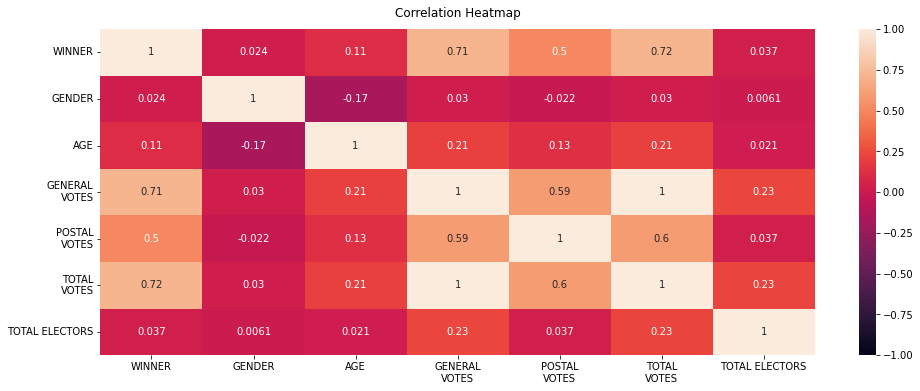

In [ ]:
#Exibindo um gráfico de correlação.
dadosCor = dados.corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dadosCor, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Text(0.5, 1.0, 'Relação entre os vencedores e o total de número de eleitores.')

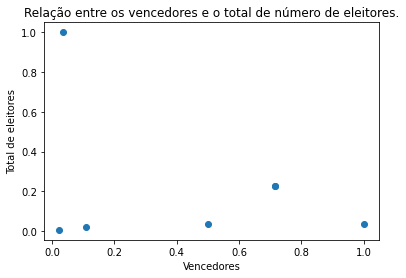

In [ ]:
plt.scatter(dadosCor["WINNER"], dadosCor["TOTAL ELECTORS"]) #"Corrigir" isso
plt.xlabel("Vencedores")
plt.ylabel("Total de eleitores")
plt.title("Relação entre os vencedores e o total de número de eleitores.")

In [ ]:
df = pd.DataFrame(dadosCor)
mean_df = df['AGE'].mean()
print("A média de idade de pessoas é de: ",mean_df)


A média de idade de pessoas é de:  0.21569696335513128


In [ ]:
sns.boxplot(data=dadosCor, x="STATE", y="TOTAL ELECTORS", hue_order= "AGE", whis=7.5, width=2.0,fliersize=9);
#Por que me odeias Seaborn???

Códigos e análises da PARTE 2:
☘

In [ ]:
X = dadosCor.drop(columns=["WINNER"]) # Features
Y = dadosCor["WINNER"]                # Label

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # Treino X Teste

In [ ]:
scaler = StandardScaler()                          # Padronização dos dados 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, Y_train)
Y_pred = model.predict(X_test_scaled)

In [ ]:
r2_score(Y_test, Y_pred)

0.11510560201165954

## Redes Neurais

In [ ]:
# Modelos a serem utilizados
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Métricas de avaliação
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 

In [ ]:
dadosRn = dados.copy(deep=True)
dadosRn = dadosRn.drop(['STATE', 'CONSTITUENCY', 'EDUCATION'],axis=1) 
dadosRn

,WINNER,GENDER,AGE,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,TOTAL ELECTORS
0,1,0,52.0,376892,482,377374,1489790
1,0,0,54.0,318665,149,318814,1489790
2,0,0,52.0,314057,181,314238,1489790
4,1,0,58.0,644459,2416,646875,1937690
5,0,0,47.0,434199,1130,435329,1937690
...,...,...,...,...,...,...,...
2257,0,1,28.0,20563,57,20620,1916185
2258,0,0,43.0,14661,25,14686,1916185
2259,1,0,63.0,434066,178,434244,1498666
2260,0,0,49.0,427900,115,428015,1498666


In [ ]:
X = dadosRn.drop(columns=["WINNER"])  # As features são todos os dados, exceto os labels
y = dadosRn["WINNER"]                 # Os labels são as classes que queremos classificar automaticamente

# Divisão de treino e teste, sendo 20% das amostras para teste
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# Modelo utilizando Perceptron
def modeloPerceptron(x_train, x_test, y_train, y_test):
    perceptron = Perceptron(random_state=42)
    perceptron.fit(x_train, y_train)

    y_pred = perceptron.predict(x_test)

    acc = accuracy_score(y_pred, y_test)
    print(f"Acuracia Perceptron: {round(acc, 2)}")

    plot_confusion_matrix(perceptron, x_test, y_test, cmap="Blues");

In [ ]:
# Modelo utilizando MLP Classifier
def modeloMlpClassifier(x_train, x_test, y_train, y_test):

    mlp = MLPClassifier(hidden_layer_sizes=(10,),
                       random_state=3,
                       solver="lbfgs")
    mlp.fit(x_train, y_train)
    y_pred = mlp.predict(x_test)

    acc = accuracy_score(y_pred, y_test)
    print(f"Acuracia MLP: {round(acc, 2)}")
    plot_confusion_matrix(mlp, x_test, y_test, cmap="Blues");

In [ ]:
# Modelo utilizando MLP Regressor
def modeloMlpRegressor(x_train, x_test, y_train, y_test):
    
    mlp = MLPRegressor(hidden_layer_sizes=(3,),
                      random_state=5,
                      max_iter=100)
    mlp.fit(x_train, y_train)
    y_pred = mlp.predict(x_test)
    print(f"MSE: { round(mean_squared_error(y_pred, y_test), 2)}")
    print(f"MAE: { round(mean_absolute_error(y_pred, y_test), 2)}")

Acuracia Perceptron: 0.85


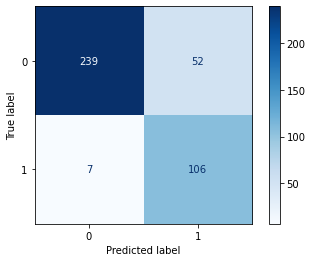

In [ ]:
# Dados padronizados Perceptron
modeloPerceptron(x_train_scaled, x_test_scaled, y_train, y_test)

ACC MLP: 0.9


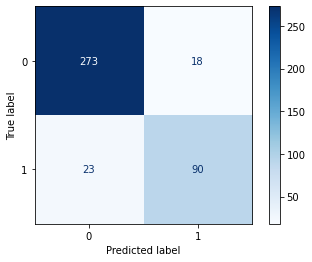

In [ ]:
# Dados padronizados MLP Classifier
modeloMlpClassifier(x_train_scaled, x_test_scaled, y_train, y_test)

In [ ]:
# Dados padronizados MLP Regressor
modeloMlpRegressor(x_train_scaled, x_test_scaled, y_train, y_test)

MSE: 0.23
MAE: 0.3
